In [1]:
stations = [
    'EPSC'
]
settings = {
    'folder_data': './data',
    'folder_output': './results/YearlyPDF',
    'theme': './resources/theme_RHS.json',
    'natural_earth_folder': './resources/'
}

In [2]:
import climetar


Bad key "text.kerning_factor" on line 4 in
/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import pandas as pd
import numpy as np

In [3]:
mpt = climetar.MetarPlotter(**settings)

In [5]:
mpt.load_data(stations[0])
mpt.filter_minutes_valid(gte=2.5)
mpt.filter_year(gte=2012,lte=2019)

In [ ]:
mpt.generate_yearly_plots()

/home/datalab/ws/CliMETAR/climetar/metarplot.py:1176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


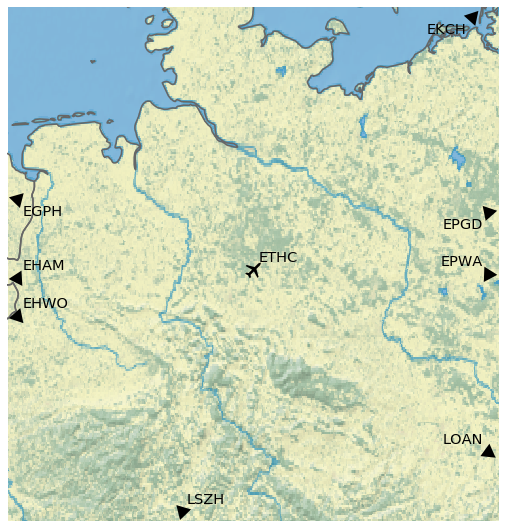

In [4]:
mpt.plotset_map(stations=['ETHC','EHAM','EKCH','EHWO','LSZH','EPWA','EPGD','EGPH','LOAN'],zoom=5)

In [5]:
shp = mpt.load_map_shape('ne_10m_admin_0_countries')

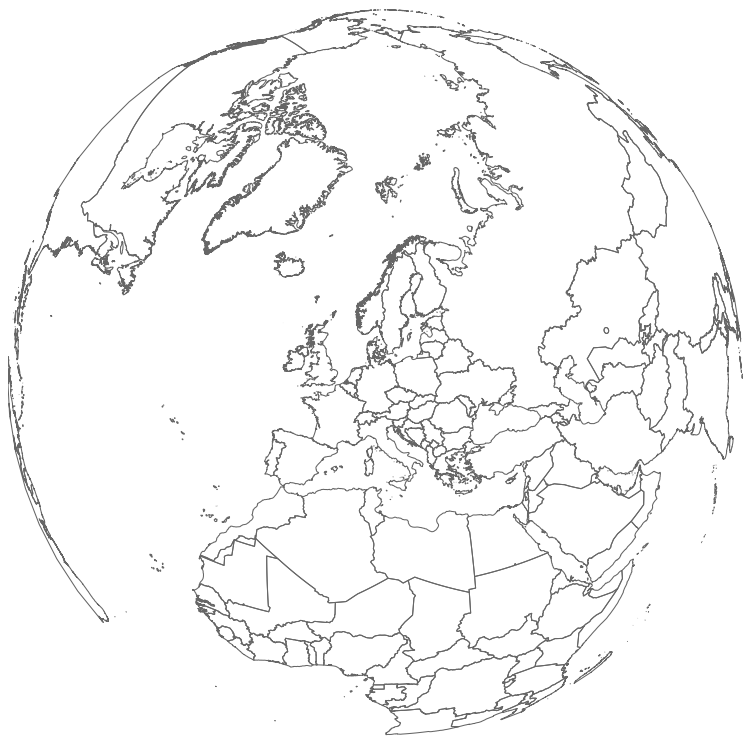

In [16]:
stations = ['ETHC','EHAM','EHWO','EKCH','LSZH','EPWA','EPGD','EGPH','LOAN']
zoom = 1

station_data = mpt.station_repo['stations'][stations[0]]
clat,clon = station_data['latitude'], station_data['longitude']
extent = [clat-(15/zoom),clat+(15/zoom),clon-(10/zoom),clon+(10/zoom)]
proj = cartopy.crs.NearsidePerspective(
    central_longitude=clat,
    central_latitude=clon,
    satellite_height=35785831
)
trans = cartopy.crs.PlateCarree()

fig,ax = plt.subplots(1,1,figsize=(5,5),subplot_kw={'projection':proj})
sf = cartopy.feature.ShapelyFeature(shp.geometries(),trans,
                facecolor='none',edgecolor='#666666',linewidth=.5)
ax.add_feature(sf)

In [ ]:
stations = ['ETHC','EHAM','EHWO','EKCH','LSZH','EPWA','EPGD','EGPH','LOAN']
zoom = 1

station_data = mpt.station_repo['stations'][stations[0]]
clat,clon = station_data['latitude'], station_data['longitude']
extent = [clat-(15/zoom),clat+(15/zoom),clon-(10/zoom),clon+(10/zoom)]
proj = cartopy.crs.NearsidePerspective(
    central_longitude=clat,
    central_latitude=clon,
    satellite_height=35785831
)
trans = cartopy.crs.PlateCarree()

fig,ax = plt.subplots(1,1,figsize=(5,5),subplot_kw={'projection':proj})

In [ ]:
for s in stations:
    station_data = mpt.station_repo['stations'][s]
    lat,lon = station_data['latitude'], station_data['longitude']
    if extent[0] <= lat <= extent[1] and extent[2] <= lon <= extent[3]:
        ax.scatter(lat,lon,transform=trans,
                   s=36*1.5,c='k',)
        ax.annotate(station_data['icao'],xy=(lat,lon),xytext=(lat+(.3/zoom),lon+(.2/zoom)),
                    xycoords=trans._as_mpl_transform(ax))
    else:
        latr, lonr, clatr, clonr = np.deg2rad(np.array([lat,lon,clat,clon]))
        x = np.cos(latr)*np.sin(clonr-lonr)
        y = np.cos(clatr)*np.sin(latr)-np.sin(clatr)*np.cos(latr)*np.cos(clonr-lonr)
        heading = np.arctan2(y,x)-.5*np.pi
        heading_deg = np.rad2deg(heading)%360
        if 45<=heading_deg<=135:
            x = .5+(.5/np.tan(heading))
            y = 1
        elif 135<=heading_deg<=225:
            x = 0
            y = .5-(.5*np.tan(heading))
        elif 225<=heading_deg<=315:
            x = .5-(.5/np.tan(heading))
            y = 0
        else:
            x = 1
            y = .5+(.5*np.tan(heading))
        x,y = np.clip(x,.02,.98),np.clip(y,.02,.98)
        ax.scatter(x,y,transform=ax.transAxes,
                   s=36*2,c='k',
                   marker=(3,0,(heading_deg-90)%360))
        ax.annotate(station_data['icao'],
                    xy=(x,y),
                    xytext=(x+(.01 if x<.5 else -.01),
                            y+(.01 if y<.5 else -.01)),
                    xycoords=ax.transAxes,
                    va=('top' if y>.5 else 'bottom'),
                    ha=('right' if x>.5 else 'left')
                   )
ax.set_extent(extent,crs=trans)

In [ ]:
.50.8931801758949869

In [ ]:
.5+.5*np.tan(np.deg2rad(45))

In [ ]:
np.array(poly.bounds)

In [ ]:
[5,15,45,60]